# Customize or Extend Python Third-Party Modules Using Partial Function

Let me explain with an example.

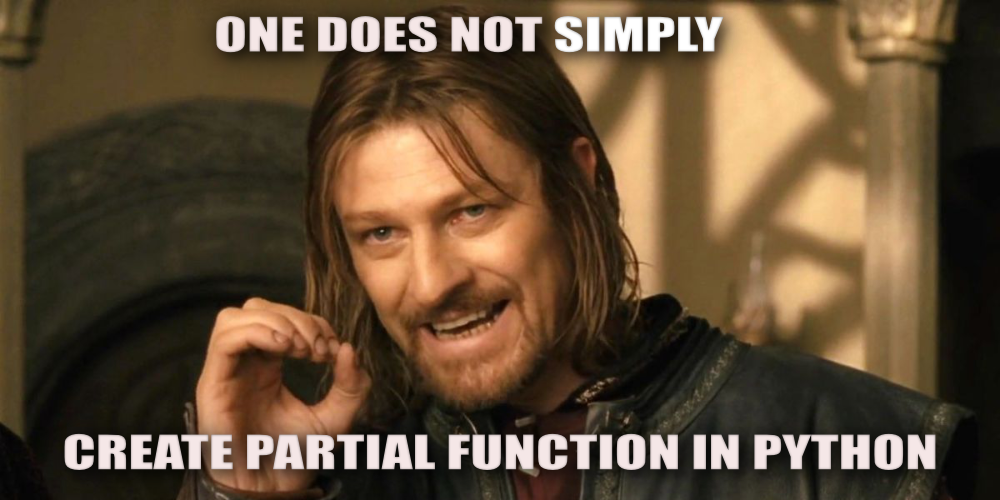


## Introduction

Partial functions allow us to fix values for some arguments of a function and generate a new function. The common example for partial function would be:

In [8]:
from functools import partial

def add(x,y): return x+y
add_2 = partial(add,y=2)
print(add_2(1)) # 3

3


This example is a solid starter example for partial functions but feels more like a syntactic sugar rather than functionality gain. In my opinion, When you are restricted by third party modules or code which you have no control over, then partial function really shines.

## Example Brief

I was playing around with [Matplotlib Animation](https://matplotlib.org/stable/api/animation_api.html) module and found that [save method](https://matplotlib.org/stable/_modules/matplotlib/animation.html#Animation.save) has a progress callback function. Callback function takes two arguments namely - `current_frame` and `total_frames` but a progress bar without meta data like file name and elapsed time is not very useful so we will use *Partial Function* to enhance it.

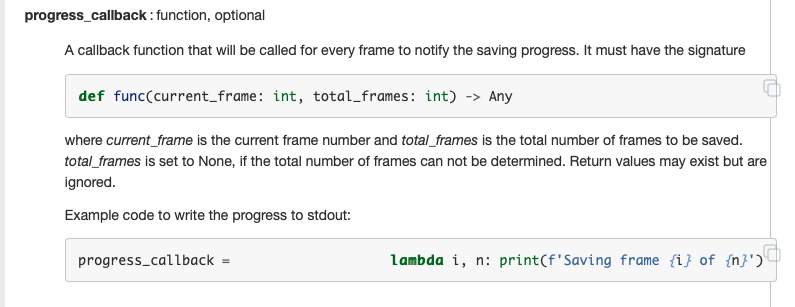

## Creating Animated Line Chart

In [193]:
%matplotlib qt

In [195]:
# Creating Animated Line Chart

# Import libraries
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
plt.style.use('seaborn-pastel')

# Set up plot
fig = plt.figure()
ax = plt.axes(xlim=(0, 4), ylim=(-2, 2))
line, = ax.plot([], [], lw=3)

# Set up line
def init():
    line.set_data([], [])
    return line,

# Update line data for each frame
def animate(i):
    x = np.linspace(0, 4, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return line,

# Create Animation Object
anim = FuncAnimation(fig, animate, init_func=init, frames=100, interval=20, blit=True)

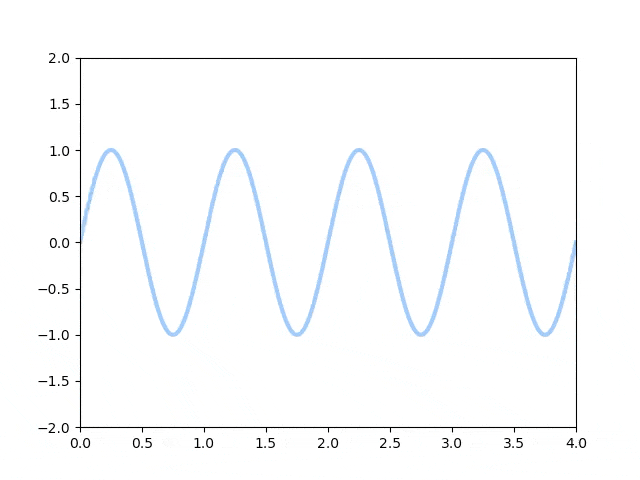

## Write to disk

In [204]:
# Write to disk

# Import Libraries
from timeit import default_timer as timer
from functools import partial
from math import ceil
from pathlib import Path

# Define progress bar
def progress_bar(count, total, filename, start):
    count = count + 1
    bar_len = 30
    filled_len = ceil(bar_len * count / total)

    percents = ceil(100.0 * count / total)
    bar = '#' * filled_len + '-' * (bar_len - filled_len)
    
    timerMsg = f"({round(timer()-start)} secs) Saving File: {filename} => [{bar}] {percents}%"
    print("\r", end = timerMsg,flush = True)


# Create partial function with latest meta data
filename = Path('Animated Line Chart.mp4')
progress = partial(progress_bar, filename = filename, start = timer())

# Save animation and pass progess func as callback
anim.save(filename, progress_callback = progress)

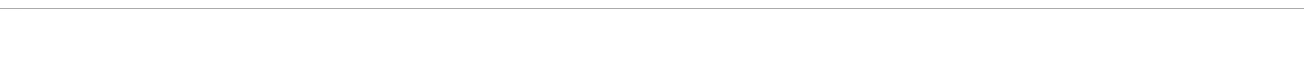

## Takeaway

Partial functions gives you more control especially when you are adding features on top of code written by others. 

## Resource

https://towardsdatascience.com/animations-with-matplotlib-d96375c5442c